In [8]:
import pandas as pd
import numpy as np

In [9]:
df = pd.read_csv("data/customer_booking.csv", encoding="ISO-8859-1")
df.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,Sat,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,Sat,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,Wed,AKLDEL,India,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,Sat,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,Wed,AKLDEL,India,1,0,1,5.52,0


In [10]:
mapping = {
    "Mon": 1,
    "Tue": 2,
    "Wed": 3,
    "Thu": 4,
    "Fri": 5,
    "Sat": 6,
    "Sun": 7,
}

df["flight_day"] = df["flight_day"].map(mapping)

In [11]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
num_passengers,50000.0,1.591240,1.020165,1.00,1.00,1.00,2.00,9.0
purchase_lead,50000.0,84.940480,90.451378,0.00,21.00,51.00,115.00,867.0
length_of_stay,50000.0,23.044560,33.887670,0.00,5.00,17.00,28.00,778.0
flight_hour,50000.0,9.066340,5.412660,0.00,5.00,9.00,13.00,23.0
flight_day,50000.0,3.814420,1.992792,1.00,2.00,4.00,5.00,7.0
wants_extra_baggage,50000.0,0.668780,0.470657,0.00,0.00,1.00,1.00,1.0
wants_preferred_seat,50000.0,0.296960,0.456923,0.00,0.00,0.00,1.00,1.0
wants_in_flight_meals,50000.0,0.427140,0.494668,0.00,0.00,0.00,1.00,1.0
flight_duration,50000.0,7.277561,1.496863,4.67,5.62,7.57,8.83,9.5
booking_complete,50000.0,0.149560,0.356643,0.00,0.00,0.00,0.00,1.0


## Data Manipulation for Decision Tree Algorithm

The data includes classification data such as Sales Channel and Trip Type. These data needs to be converted in to numerical classification and an easy qucik way to achieve it to use get_dummies from pandas as given below:

In [12]:
print(len(df["route"].unique())) #Returns 799 unique values, including all of them as indicator would hugely populate our data with columns.
print(len(df["booking_origin"].unique())) #Returns 104 unique values, if we convert them into indicator, we will have 104 new columns.
df_stashed=df[["booking_origin","route","booking_complete"]] # saving route column for individual analysis
df=df.drop(["trip_type","route","booking_origin"],axis=1)
display(df)

799
104


,num_passengers,sales_channel,purchase_lead,length_of_stay,flight_hour,flight_day,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,262,19,7,6,1,0,0,5.52,0
1,1,Internet,112,20,3,6,0,0,0,5.52,0
2,2,Internet,243,22,17,3,1,1,0,5.52,0
3,1,Internet,96,31,4,6,0,0,1,5.52,0
4,2,Internet,68,22,15,3,1,0,1,5.52,0
...,...,...,...,...,...,...,...,...,...,...,...
49995,2,Internet,27,6,9,6,1,0,1,5.62,0
49996,1,Internet,111,6,4,7,0,0,0,5.62,0
49997,1,Internet,24,6,22,6,0,0,1,5.62,0
49998,1,Internet,15,6,11,1,1,0,1,5.62,0


### Convert categorical data into one-hot encoded format

For the analysis we have to either drop the columns with categorical data or to convert them into True False data, this can be done in two method, first OneHotEncoder:

In [16]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer

transformer = make_column_transformer(
    (OneHotEncoder(), ['sales_channel']),  # Pass column name as a list
    remainder='passthrough'
)

# Fit and transform the data
transformed = transformer.fit_transform(df)

# Convert the output back to a DataFrame
# Use get_feature_names_out() method to get new column names
transformed_df = pd.DataFrame(
    transformed, 
    columns=transformer.get_feature_names_out()
)

# Now you can display the DataFrame
display(transformed_df)

,onehotencoder__sales_channel_Internet,onehotencoder__sales_channel_Mobile,remainder__num_passengers,remainder__purchase_lead,remainder__length_of_stay,remainder__flight_hour,remainder__flight_day,remainder__wants_extra_baggage,remainder__wants_preferred_seat,remainder__wants_in_flight_meals,remainder__flight_duration,remainder__booking_complete
0,1.0,0.0,2.0,262.0,19.0,7.0,6.0,1.0,0.0,0.0,5.52,0.0
1,1.0,0.0,1.0,112.0,20.0,3.0,6.0,0.0,0.0,0.0,5.52,0.0
2,1.0,0.0,2.0,243.0,22.0,17.0,3.0,1.0,1.0,0.0,5.52,0.0
3,1.0,0.0,1.0,96.0,31.0,4.0,6.0,0.0,0.0,1.0,5.52,0.0
4,1.0,0.0,2.0,68.0,22.0,15.0,3.0,1.0,0.0,1.0,5.52,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
49995,1.0,0.0,2.0,27.0,6.0,9.0,6.0,1.0,0.0,1.0,5.62,0.0
49996,1.0,0.0,1.0,111.0,6.0,4.0,7.0,0.0,0.0,0.0,5.62,0.0
49997,1.0,0.0,1.0,24.0,6.0,22.0,6.0,0.0,0.0,1.0,5.62,0.0
49998,1.0,0.0,1.0,15.0,6.0,11.0,1.0,1.0,0.0,1.0,5.62,0.0


Let’s see what we did here:

We imported the make_column_transformer() function
The function took a tuple containing the transformer we want to apply and the column to which to apply to. In this case, we wanted to use the OneHotEncoder() transformer and apply it to the 'island' column.
We used the remainder='passthrough' parameter to specify that all other columns should be left untouched.
We then applied the .fit_transform() method to our DataFrame.
Finally, we reconstructed the DataFrame
In the next section, you’ll learn how to use the make_column_transformer() function to one-hot encode multiple columns with sklearn.

Or as second option we can just use 
```
pd.get_dummies()
```
Using pd.get_dummies(df) is very useful for quickly and easily preparing your data for algorithms that require numerical input, like correlation analysis or machine learning models. 

We will move on with this method

In [17]:
df=pd.get_dummies(df)

In [18]:
display(df)

,num_passengers,purchase_lead,length_of_stay,flight_hour,flight_day,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete,sales_channel_Internet,sales_channel_Mobile
0,2,262,19,7,6,1,0,0,5.52,0,True,False
1,1,112,20,3,6,0,0,0,5.52,0,True,False
2,2,243,22,17,3,1,1,0,5.52,0,True,False
3,1,96,31,4,6,0,0,1,5.52,0,True,False
4,2,68,22,15,3,1,0,1,5.52,0,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
49995,2,27,6,9,6,1,0,1,5.62,0,True,False
49996,1,111,6,4,7,0,0,0,5.62,0,True,False
49997,1,24,6,22,6,0,0,1,5.62,0,True,False
49998,1,15,6,11,1,1,0,1,5.62,0,True,False


In [59]:
df["booking_complete"].value_counts()

booking_complete
0    42522
1     7478
Name: count, dtype: int64

In [29]:
from sklearn.preprocessing import StandardScaler


# List of numerical columns to scale
numerical_cols = ['num_passengers', 'purchase_lead', 'length_of_stay', 'flight_hour', 'flight_day', 'flight_duration']

#create a standard scaler object
scaler = StandardScaler()

#fit and transform the data
df[numerical_cols]  = scaler.fit_transform(df[numerical_cols] )

In [31]:
display(df)

,num_passengers,purchase_lead,length_of_stay,flight_hour,flight_day,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete,sales_channel_Internet,sales_channel_Mobile
0,0.400684,1.957530,-0.119353,-0.381764,1.096754,1,0,0,-1.174175,0,True,False
1,-0.579559,0.299164,-0.089844,-1.120780,1.096754,0,0,0,-1.174175,0,True,False
2,0.400684,1.747470,-0.030824,1.465775,-0.408687,1,1,0,-1.174175,0,True,False
3,-0.579559,0.122272,0.234761,-0.936026,1.096754,0,0,1,-1.174175,0,True,False
4,0.400684,-0.187290,-0.030824,1.096267,-0.408687,1,0,1,-1.174175,0,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
49995,0.400684,-0.640577,-0.502977,-0.012257,1.096754,1,0,1,-1.107368,0,True,False
49996,-0.579559,0.288108,-0.502977,-0.936026,1.598567,0,0,0,-1.107368,0,True,False
49997,-0.579559,-0.673744,-0.502977,2.389544,1.096754,0,0,1,-1.107368,0,True,False
49998,-0.579559,-0.773246,-0.502977,0.357251,-1.412314,1,0,1,-1.107368,0,True,False


C:\Users\ALPER\AppData\Local\Temp\ipykernel_17024\2615501139.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=booking_corr.values, y=booking_corr.index, palette=palette)


<Figure size 1200x800 with 0 Axes>

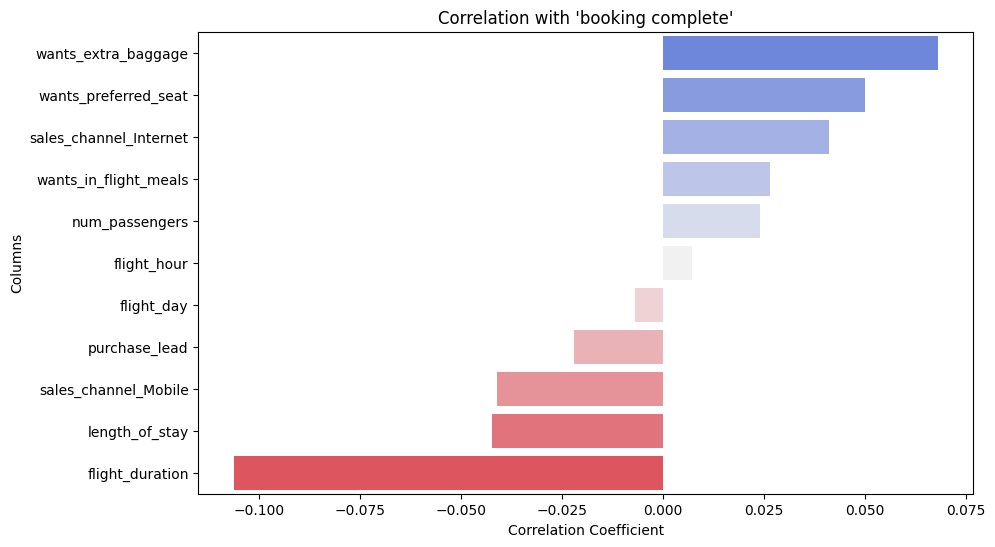

In [32]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12,8))
corrMatrix = df.corr() 

# Extract correlation values with 'booking complete'
booking_corr = corrMatrix['booking_complete'].sort_values(ascending=False)

# Optionally, you can drop the correlation of 'booking complete' with itself
booking_corr = booking_corr.drop(labels=['booking_complete'])

# Little bit of visual play doesn't hurt!
palette = sns.diverging_palette(260, 10, s=85, l=55, n=len(booking_corr), center="light")

# Visualize the correlations using a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x=booking_corr.values, y=booking_corr.index, palette=palette)
plt.title("Correlation with 'booking complete'")
plt.xlabel("Correlation Coefficient")
plt.ylabel("Columns")
plt.show()


## Data Study

In [34]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.model_selection import cross_validate, StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.utils import class_weight
from sklearn.metrics import classification_report

# Choose all the predictors as the variable 'X' (note capitalization of X for multiple features)
X = df.drop(["booking_complete"],axis=1).copy()
# Choose the response variable 'y' 
y = df.booking_complete

x_train, x_test, y_train, y_test = train_test_split(X,y,train_size=0.8,random_state=0)

model = RandomForestClassifier(min_samples_split=15,random_state=0)
baseline_model_cv = cross_validate(model, x_train, y_train, cv=StratifiedKFold(n_splits=5), n_jobs=-1, scoring="recall")

print(f"{baseline_model_cv['test_score'].mean():.3f} +/- {baseline_model_cv['test_score'].std():.3f}")



0.011 +/- 0.003


## Results

The recall score of %1,1 is not good, lets investigate what is the cause.

Lets quickly check ``confusion matrix`` to see how well our `selections are.`

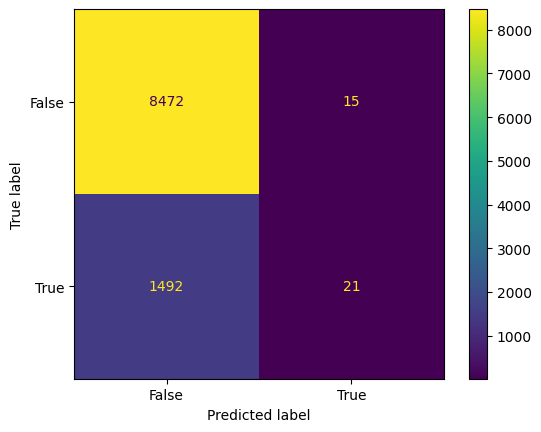

In [35]:
from sklearn import metrics

model.fit(x_train,y_train)
y_pred=model.predict(x_test)

confusion_matrix=metrics.confusion_matrix(y_test, y_pred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

cm_display.plot()
plt.show()

<!-- From confusion matrix, we can see our true positives and false positives are so close to each other.  -->

From the `confusion matrix` we notice an important specification in our data. The data is imbalanced.

We have to deal with the imbalanced data.

In [45]:
rf_balanced = RandomForestClassifier(class_weight='balanced', random_state=0, n_jobs=-1)
rf_balanced_cv = cross_validate(rf_balanced, x_train, y_train, cv=StratifiedKFold(n_splits=5), n_jobs=-1, scoring="recall")
rf_balanced.fit(x_train,y_train)
print(f"{rf_balanced_cv['test_score'].mean():.3f} +/- {baseline_model_cv['test_score'].std():.3f}")

0.051 +/- 0.003


### The results improved slightly

We have used class weight method of random forest, this have caused the model to give more importance for the minority data. Lets investigate if we can improve further.

In [46]:
# Train the random forest model using class_weight = 'balanced_subsample'
rf_balanced_subsample = RandomForestClassifier(class_weight='balanced_subsample', random_state=0, n_jobs=-1)
rf_balanced_subsample_cv = cross_validate(rf_balanced_subsample, x_train, y_train, cv=StratifiedKFold(n_splits=5), n_jobs=-1, scoring="recall")
# Check the model performance
print(f"{rf_balanced_subsample_cv['test_score'].mean():.3f} +/- {rf_balanced_subsample_cv['test_score'].std():.3f}")

0.047 +/- 0.006


Subsample balancing method have not created significant difference.

# Lets Compare Every Model:

In [51]:
base_model = model.fit(x_train, y_train)
base_model_prediction = base_model.predict(x_test)
print("Base Random Tree Model")
print(classification_report(y_test, base_model_prediction))

rf_balanced_model = rf_balanced.fit(x_train, y_train)
rf_balanced_prediction = rf_balanced_model.predict(x_test)
print("Balanced Random Tree")
print(classification_report(y_test, rf_balanced_prediction))

rf_balancedsub_model = rf_balanced_subsample.fit(x_train, y_train)
rf_balancedsub_model_prediction = rf_balancedsub_model.predict(x_test)
print("Balanced Subgroup Random Tree")
print(classification_report(y_test, rf_balancedsub_model_prediction))

Base Random Tree Model
              precision    recall  f1-score   support

           0       0.85      1.00      0.92      8487
           1       0.58      0.01      0.03      1513

    accuracy                           0.85     10000
   macro avg       0.72      0.51      0.47     10000
weighted avg       0.81      0.85      0.78     10000

Balanced Random Tree
              precision    recall  f1-score   support

           0       0.85      0.99      0.92      8487
           1       0.44      0.06      0.10      1513

    accuracy                           0.85     10000
   macro avg       0.65      0.52      0.51     10000
weighted avg       0.79      0.85      0.79     10000

Balanced Subgroup Random Tree
              precision    recall  f1-score   support

           0       0.85      0.99      0.92      8487
           1       0.45      0.06      0.10      1513

    accuracy                           0.85     10000
   macro avg       0.65      0.52      0.51     10000


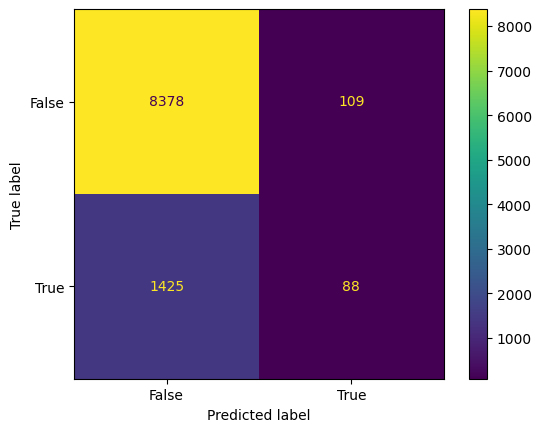

In [52]:
confusion_matrix=metrics.confusion_matrix(y_test, rf_balancedsub_model_prediction)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

cm_display.plot()
plt.show()

Lets try to see if we can improve the model with the help of sampler

In [53]:
from imblearn.over_sampling import RandomOverSampler, SMOTE
from imblearn.under_sampling import RandomUnderSampler

# resamp = RandomOverSampler(sampling_strategy=1, random_state=0)
smote=SMOTE(sampling_strategy=0.7,random_state=0)
resamp_under = RandomUnderSampler(random_state=0)
balX, baly = smote.fit_resample(x_train,y_train)
# balX, baly = smote.fit_resample(x_train,y_train)
balX, baly = resamp_under.fit_resample(balX,baly)

print(baly.value_counts())


booking_complete
0    23824
1    23824
Name: count, dtype: int64


              precision    recall  f1-score   support

           0       0.86      0.92      0.89      8487
           1       0.30      0.20      0.24      1513

    accuracy                           0.81     10000
   macro avg       0.58      0.56      0.56     10000
weighted avg       0.78      0.81      0.79     10000



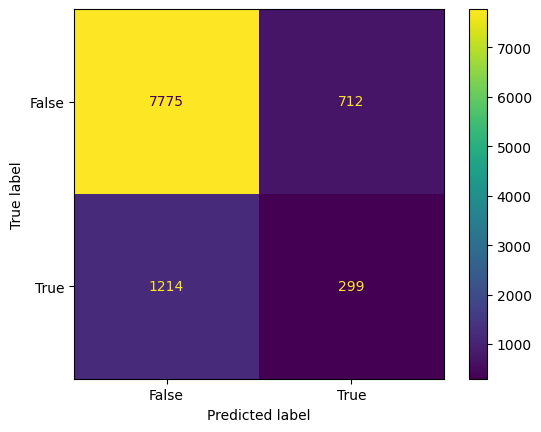

In [63]:
model_balanced = RandomForestClassifier(class_weight='balanced',random_state=0,n_jobs=-1)
model_balanced.fit(balX,baly)
base_model_prediction_sampled=model_balanced.predict(x_test)
print(classification_report(y_test, base_model_prediction_sampled))

confusion_matrix=metrics.confusion_matrix(y_test, base_model_prediction_sampled)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

cm_display.plot()
plt.show()

              precision    recall  f1-score   support

           0       0.89      0.58      0.70      8487
           1       0.20      0.61      0.31      1513

    accuracy                           0.58     10000
   macro avg       0.55      0.59      0.50     10000
weighted avg       0.79      0.58      0.64     10000



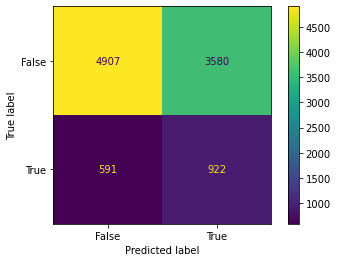

In [ ]:

# Train the logistic regression model using the balanced weights
# lr_balanced = LogisticRegression(class_weight='balanced', random_state=0, n_jobs=-1)
lr_balanced = LogisticRegression(random_state=0, n_jobs=-1)
lr_balanced.fit(balX,baly)
# Check the model performance
lr_model_prediction_sampled=lr_balanced.predict(x_test)
print(classification_report(y_test, lr_model_prediction_sampled))

confusion_matrix=metrics.confusion_matrix(y_test, lr_model_prediction_sampled)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

cm_display.plot()
plt.show()


## ``Not Promising Results``
#### Lets manipulate selected predictors in our data

Remember we have previously made a graph to see features relationship with ``boking_complete``.

With that graph in mind we will drop some columns to decrease dimentionality in our dataset.

booking_complete
0    23824
1    23824
Name: count, dtype: int64


              precision    recall  f1-score   support

           0       0.89      0.56      0.68      8487
           1       0.20      0.62      0.30      1513

    accuracy                           0.57     10000
   macro avg       0.55      0.59      0.49     10000
weighted avg       0.79      0.57      0.63     10000



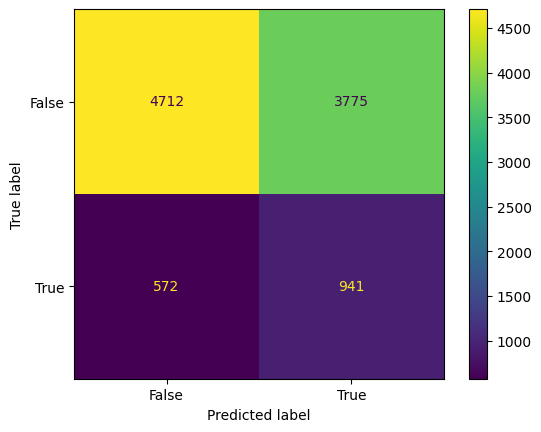

In [75]:
# Dropped columns for decreased dimentionality
columns_to_drop=['flight_day','flight_hour','num_passengers','purchase_lead','booking_complete',"length_of_stay"]


# Choose all the predictors as the variable 'X' (note capitalization of X for multiple features)
X = df.drop(columns_to_drop,axis=1).copy()
# Choose the response variable 'y' 
y = df.booking_complete
x_train, x_test, y_train, y_test = train_test_split(X,y,train_size=0.8,random_state=0)


# resamp = RandomOverSampler(sampling_strategy=1, random_state=0)
smote=SMOTE(sampling_strategy=0.7,random_state=0)
resamp_under = RandomUnderSampler(random_state=0)
balX, baly = smote.fit_resample(x_train,y_train)
# balX, baly = smote.fit_resample(x_train,y_train)
balX, baly = resamp_under.fit_resample(balX,baly)

print(baly.value_counts())

# Train the logistic regression model using the balanced weights
# lr_balanced = LogisticRegression(class_weight='balanced', random_state=0, n_jobs=-1)
lr_balanced = LogisticRegression(random_state=0, n_jobs=-1)
lr_balanced.fit(balX,baly)
# Check the model performance
lr_model_prediction_sampled=lr_balanced.predict(x_test)
print(classification_report(y_test, lr_model_prediction_sampled))

confusion_matrix=metrics.confusion_matrix(y_test, lr_model_prediction_sampled)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

cm_display.plot()
plt.show()

              precision    recall  f1-score   support

           0       0.90      0.61      0.73      8487
           1       0.22      0.63      0.33      1513

    accuracy                           0.61     10000
   macro avg       0.56      0.62      0.53     10000
weighted avg       0.80      0.61      0.67     10000



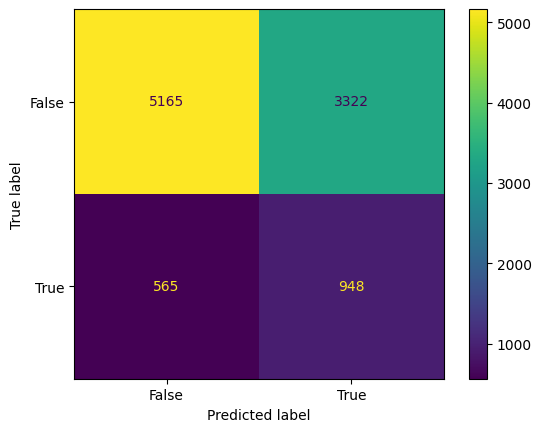

In [79]:
model_balanced = RandomForestClassifier(class_weight='balanced',random_state=0,n_jobs=-1,n_estimators=200,max_depth=50)
model_balanced.fit(balX,baly)

# Get probability predictions
probabilities = model_balanced.predict_proba(x_test)

# Choose a new threshold
threshold = 0.5

# Apply the threshold to get new predictions
base_model_prediction_sampled = np.where(probabilities[:, 1] > threshold, 1, 0)

print(classification_report(y_test, base_model_prediction_sampled))

confusion_matrix=metrics.confusion_matrix(y_test, base_model_prediction_sampled)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

cm_display.plot()
plt.show()

              precision    recall  f1-score   support

           0       0.90      0.56      0.69      8487
           1       0.21      0.67      0.32      1513

    accuracy                           0.58     10000
   macro avg       0.56      0.61      0.51     10000
weighted avg       0.80      0.58      0.64     10000



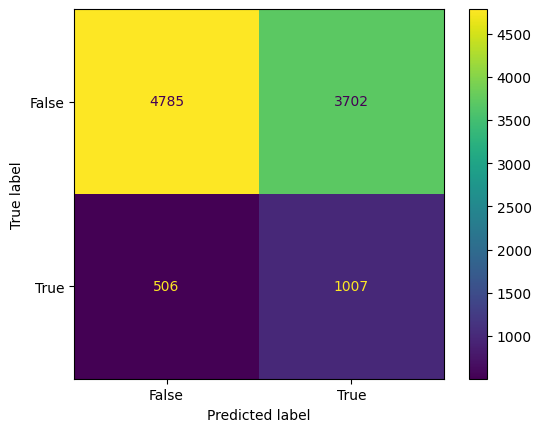

In [81]:
model_balanced = RandomForestClassifier(class_weight='balanced',random_state=0,n_jobs=-1,n_estimators=300,max_depth=80,min_samples_split=3,min_samples_leaf=2)
model_balanced.fit(balX,baly)

# Get probability predictions
probabilities = model_balanced.predict_proba(x_test)

# Choose a new threshold
threshold = 0.45

# Apply the threshold to get new predictions
base_model_prediction_sampled = np.where(probabilities[:, 1] > threshold, 1, 0)

print(classification_report(y_test, base_model_prediction_sampled))

confusion_matrix=metrics.confusion_matrix(y_test, base_model_prediction_sampled)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

cm_display.plot()
plt.show()

### Discussion

**Focus on True Positive Performance**: In this project, our primary goal was to predict 'booking complete' status for airline bookings, a critical metric for operational and revenue efficiency in the airline industry. Recognizing the substantial business value, we emphasized maximizing True Positive (True/True) performance. This approach ensures that actual bookings are accurately identified, which is vital for effective resource allocation and planning.

**Dealing with Imbalanced Data**: The dataset exhibited a significant class imbalance, a common challenge in binary classification problems. To counter this, we utilized **Synthetic Minority Over-sampling Technique (SMOTE)**, effectively balancing the distribution of completed and non-completed bookings. This technique was crucial in providing a robust foundation for model training.

**Model Selection and Threshold Adjustment**: After experimenting with different models and balancing methods, we chose the **Random Forest Classifier** with hyperparameter tuning, which showed promising results in enhancing the True Positive rate. Additionally, we strategically **lowered the probability threshold** for predicting a booking as complete. This adjustment further aligned our model's predictions with our focus on identifying actual bookings.

**Cost-Benefit Analysis Consideration**: While our analysis prioritized True Positive outcomes, in a real-world setting, a comprehensive **cost-benefit analysis** is crucial. This analysis would balance the financial and operational impacts of all prediction outcomes (True Positives, True Negatives, False Positives, and Negatives). However, due to the project's scope and data limitations, a detailed cost-benefit analysis, which requires in-depth business data and insights, was not feasible. Such an analysis is essential in real-life applications to guide model selection and performance evaluation based on specific business needs and priorities.

In summary, this project highlights the importance of aligning data analysis techniques with business objectives, the challenges of dealing with imbalanced datasets, and the necessity of integrating technical modeling with a comprehensive understanding of the business context for effective decision-making.